# Homework 5 (Dev Mody)
## Exercise 4 (Boosting Tree Regression)

Scikit-Learn has a powerful tree regression built in. In this exercise, we will verify that it is actually working correctly by explicitly implementing it in Python and plotting the results together with the output from Scikit-Learn. That sounds like a lot of work but we will simplify things by first of all focussing on a 1D model and secondly assuming that we only need to know the result of the regression in the points $x_p$. The model predicted by Scikit-Learn can be evaluated to any $x$ but that becomes a little too much book keeping for our purposes. Following the Scikit-Learn manual we generate noisy data $\sin(x)$ and perform a Tree Regression to `max_depth=2` and `max_depth=5` as follows:

```python
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(6.3 * rng.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y += 0.3 * (0.5 - rng.rand(len(X)))
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)
# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)
```

In this example, we are asking Scikit-Learn for 2 tree regressions to a maximum depth of 2 and 5 respectively. 

Suppose, we have noisy data $\{x_p, y_p\}$ with $x_p$ sorted along the x-axis. Then, as discussed in class and in Chapter 14, the splitting points for the tree stumps will be between 2 values of $x_s$ and $x_{s + 1}$. The value for the leaves on either side is simply the average of the $y_p$'s on either side. In order to determine the optimal split we can use a Least Squared Cost. We can then write a function that recurisvely calls itself on smaller and smaller intervals. To simplify things, we can assume all the $x_p$ and $y_p$ are distinct. Implement a simple version of a Tree Regressor that can perform a Tree Regression to a specific maximum depth. Make sure that you correctly handle the case where an interval contains just a single point. Plot your results along with the results from Scikit-Learn as well as the original data. Do they agree?

My implementation starts as follows:

```python
def My_TreeRegressor (y, il, ir, max_depth, level=0):
    global yreg
    if (level==0): yreg=np.zeros(len(y))
```

Here, I keep track of the final tree regression in the global array `yreg`. Perhaps one of you can find a more elegant way of returning the final tree regression fit. Since we're only asking for the regression results in the discrete points $x_p$, `yreg` is simply an array in my implementation:

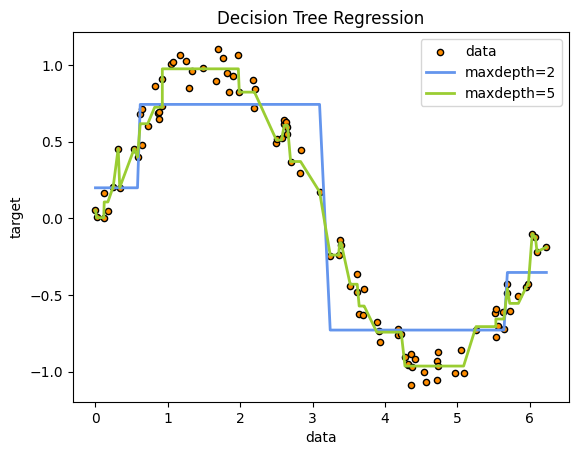

In [1]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(6.3 * rng.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y += 0.3 * (0.5 - rng.rand(len(X)))
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)

regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X, y_1, color="cornflowerblue",
         label="maxdepth=2", linewidth=2)
plt.plot(X, y_2, color="yellowgreen", label="maxdepth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

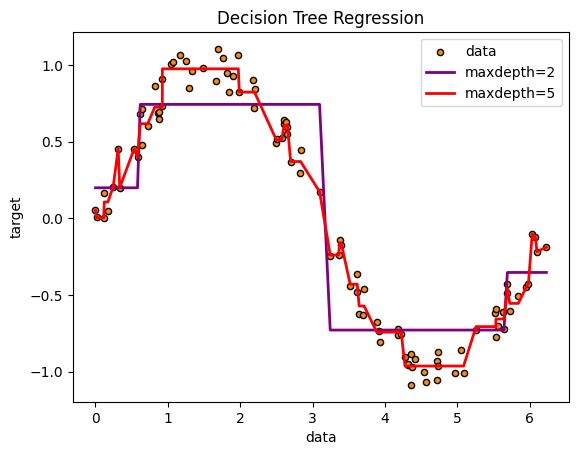

In [7]:
def My_TreeRegressor (y, il, ir, max_depth, level=0, yreg=None):
    if yreg is None: yreg=np.zeros(len(y))
    
    if level == max_depth or il >= ir - 1:
        y_mean = np.mean(y[il:ir])
        yreg[il:ir] = y_mean
        return yreg
    
    best_split = None
    best_cost = float('inf')
    
    for i in range(il+1, ir):
        left_y_mean = np.mean(y[il:i])
        right_y_mean = np.mean(y[i:ir])
        
        cost = np.sum((y[il:i] - left_y_mean) ** 2) + np.sum((y[i:ir] - right_y_mean) ** 2)
        if cost < best_cost:
            best_cost = cost
            best_split = i
            
    My_TreeRegressor(y, il, best_split, max_depth, level + 1, yreg)
    My_TreeRegressor(y, best_split, ir, max_depth, level + 1, yreg)
    
    return yreg

plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X, My_TreeRegressor(y,0,len(y),2), color="purple", label="maxdepth=2", linewidth=2)
plt.plot(X, My_TreeRegressor(y,0,len(y),5), color="red", label="maxdepth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()
    

My plot and the plot from Scikit-Learn agree as the plots are essentially identical.